In [8]:
### First we will import module that helps to import MATLAB datafile
from scipy.io import loadmat

In [17]:
#  training data stored in arrays X, y
data = loadmat('/Users/maheshworpaudel/Desktop/coursera_in_python/week8_7sCDOPzNR8uAgzj8zXfL7A_4f8515568abe4b3b980175853bd0fcf1_ex7-octave/ex7data1.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011', '__version__': '1.0', '__globals__': [], 'X': array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],


In [18]:
x1 = data['X'][:, 0]
x2 = data['X'][:, 1]
print(len(x1))

50


In [19]:
import matplotlib.pyplot as plt

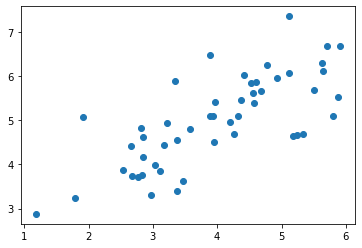

In [20]:
plt.scatter(x1, x2)
plt.show()

In [21]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# # splits the training and test data set in 80% : 20%
# # assign random_state to any value.This ensures consistency.
# train_data, test_data = train_test_split(data['X'], test_size = 0.001, random_state=5)
# x1_train = train_data[:, 0]
# x1_test = test_data[:, 0]
# x2_train = train_data[:, 1]
# x2_test = test_data[:, 1]
# print(train_data.shape)

In [22]:
#Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(data['X'])
Scaled_data=scaling.transform(data['X'])

In [23]:
# Set the n_components=3
pca=PCA(n_components=1)
x=pca.fit_transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(50, 1)


In [24]:
components = pca.components_
print(components)

[[-0.70710678 -0.70710678]]


In [28]:
variance = pca.explained_variance_
print(variance)

[1.77094936]


In [29]:
print(pca.explained_variance_ratio_)

[0.86776519]


In [67]:
x_recover = pca.inverse_transform(x)

In [68]:
print(x_recover)

[[-1.05805279 -1.05805279]
 [ 0.65208021  0.65208021]
 [-0.86577611 -0.86577611]
 [-1.16238578 -1.16238578]
 [-0.90030292 -0.90030292]
 [ 0.69071588  0.69071588]
 [-0.89718548 -0.89718548]
 [ 1.65567835  1.65567835]
 [ 0.02120713  0.02120713]
 [ 0.55275802  0.55275802]
 [ 0.44666359  0.44666359]
 [ 0.39088959  0.39088959]
 [ 0.06341447  0.06341447]
 [ 0.371835    0.371835  ]
 [-1.10602429 -1.10602429]
 [ 1.35488989  1.35488989]
 [ 0.62706042  0.62706042]
 [-0.67604623 -0.67604623]
 [ 1.64752825  1.64752825]
 [ 0.33795364  0.33795364]
 [ 1.56798945  1.56798945]
 [-0.27506901 -0.27506901]
 [ 1.26206077  1.26206077]
 [-0.03659622 -0.03659622]
 [-1.17742041 -1.17742041]
 [-0.35930621 -0.35930621]
 [ 0.874769    0.874769  ]
 [ 0.82871979  0.82871979]
 [-0.59553725 -0.59553725]
 [ 0.00490148  0.00490148]
 [ 0.1611793   0.1611793 ]
 [ 1.06991986  1.06991986]
 [-0.94663271 -0.94663271]
 [ 0.41897802  0.41897802]
 [-0.48017928 -0.48017928]
 [ 0.95670134  0.95670134]
 [-1.19323912 -1.19323912]
 

In [69]:
x_recover_to_unscaled = scaling.inverse_transform(x_recover)

In [62]:
m=slope_pca_vector = components[0][1]/components[0][0]
print(m)

0.9999999999999996


In [63]:
import numpy as np

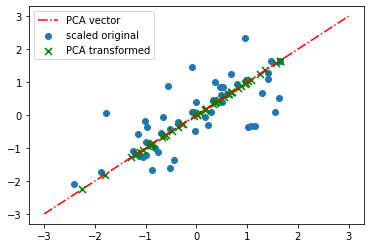

In [85]:
plt.scatter(Scaled_data[:, 0], Scaled_data[:, 1], label='scaled original')
plt.plot(np.linspace(-3, 3, 10), m*np.linspace(-3, 3, 10), 'r-.', label='PCA vector')
plt.scatter(x_recover[:, 0], x_recover[:, 1], s=50, marker='x', color='green', label='PCA transformed')
plt.legend(loc='best')
plt.show()

#### On face image dataset

In this part of the exercise, you will run PCA on face images to see how it
can be used in practice for dimension reduction. The dataset ex7faces.mat
contains a dataset X of face images, each 32 by 32 in grayscale. Each row
of X corresponds to one face image (a row vector of length 1024). step is to load and visualize the first 100 of these face images

In [92]:
data = loadmat('/Users/maheshworpaudel/Desktop/coursera_in_python/week8_7sCDOPzNR8uAgzj8zXfL7A_4f8515568abe4b3b980175853bd0fcf1_ex7-octave/ex7faces.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011', '__version__': '1.0', '__globals__': [], 'X': array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
        -111.86631387,  -99.86631387],
       [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
          -8.86631387,    0.13368613],
       [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
        -111.86631387, -111.86631387],
       ...,
       [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
          80.13368613,   59.13368613],
       [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
         -41.86631387,  -46.86631387],
       [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
          17.13368613,   18.13368613]])}


In [93]:
X = data['X']

In [94]:
def display_data(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data in a nice grid.

    Parameters
    ----------
    X : array_like
        The input data of size (m x n) where m is the number of examples and n is the number of
        features.

    example_width : int, optional
        THe width of each 2-D image in pixels. If not provided, the image is assumed to be square,
        and the width is the floor of the square root of total number of pixels.

    figsize : tuple, optional
        A 2-element tuple indicating the width and height of figure in inches.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

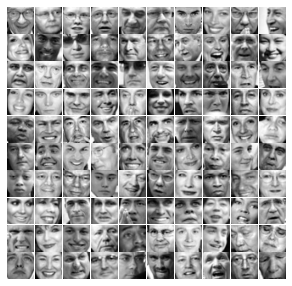

In [102]:
display_data(X[:100], figsize=(5, 5))

In [103]:
#Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
Scaled_data=scaling.transform(X)

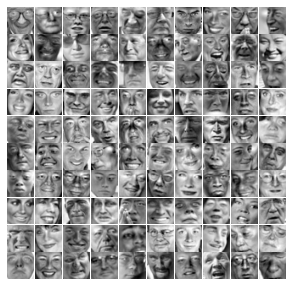

In [105]:
display_data(Scaled_data[:100], figsize=(5, 5))

In [139]:
# Set the n_components=32
pca=PCA(n_components=32)
x=pca.fit_transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(5000, 32)


In [140]:
components = pca.components_
print(components)

[[-0.01425307 -0.01474233 -0.01501482 ... -0.00895052 -0.00769526
  -0.00692969]
 [ 0.03606596  0.03809858  0.03988747 ... -0.03119618 -0.0290752
  -0.02725819]
 [ 0.04561884  0.04756249  0.05082085 ...  0.05691806  0.05579144
   0.05339471]
 ...
 [ 0.04684394  0.04964983  0.05355428 ... -0.07033472 -0.07429571
  -0.07140603]
 [ 0.04788655  0.0481088   0.04939667 ...  0.00752207  0.01233913
   0.01467117]
 [ 0.0148756   0.01522371  0.01565986 ... -0.00444118 -0.00470002
  -0.0070587 ]]


In [141]:
variance = pca.explained_variance_
print(variance)

[337.09244031 130.96499026  54.70447264  39.73784368  33.16925068
  22.90140943  20.32882641  19.41925527  15.98226955  14.70614899
  13.52052161  12.89504956  10.58675441   9.42934208   8.46807673
   8.43095756   7.38641098   7.08633954   6.79640888   6.51425762
   5.61142203   5.49014727   5.36897151   5.16320886   5.00505794
   4.82639789   4.80371595   4.50394169   4.33045564   4.21018205
   4.03633999   3.92121548]


In [142]:
print(pca.explained_variance_ratio_)

[0.329126   0.12786992 0.05341165 0.03879873 0.03238537 0.02236018
 0.0198484  0.01896032 0.01560456 0.0143586  0.01320099 0.0125903
 0.01033656 0.0092065  0.00826795 0.00823171 0.00721185 0.00691887
 0.00663579 0.00636031 0.00547881 0.0053604  0.00524209 0.00504119
 0.00488677 0.00471234 0.00469019 0.0043975  0.00422811 0.00411068
 0.00394095 0.00382855]


In [143]:
x_recover = pca.inverse_transform(x)
print(x_recover)

[[-0.34488746 -0.33866401 -0.33022661 ... -0.50092363 -0.42200668
  -0.34271029]
 [ 0.13718863  0.13668855  0.12241482 ... -0.62632736 -0.58491034
  -0.53154163]
 [ 0.39253083  0.35885791  0.35335815 ... -0.97452312 -0.96633776
  -0.95063686]
 ...
 [-0.32789206 -0.31214541 -0.25784743 ...  1.75754307  1.69910746
   1.6120493 ]
 [ 0.52983053  0.58552109  0.62944658 ... -0.13307078 -0.07331191
  -0.03885391]
 [-1.5039593  -1.5627744  -1.62084089 ...  0.65092212  0.64651761
   0.61587819]]


In [144]:
x_recover_to_unscaled = scaling.inverse_transform(x_recover)
print(x_recover_to_unscaled)

[[-39.38289036 -37.86351651 -36.04152606 ... -57.47691825 -55.49219163
  -52.33555987]
 [-14.72276527 -13.92576786 -13.65195625 ... -64.27388679 -64.51493478
  -63.00635718]
 [ -1.6609877   -2.73778929  -2.22851709 ... -83.14633591 -85.64104939
  -86.68929098]
 ...
 [-38.51350768 -36.52809572 -32.46134434 ...  64.93352687  61.98992681
   58.12726358]
 [  5.36244243   8.67648816  11.42799081 ... -37.53904173 -36.1790397
  -35.1647354 ]
 [-98.67406358 -99.50712326 -99.88079668 ...   4.95391162   3.69014793
    1.83396083]]


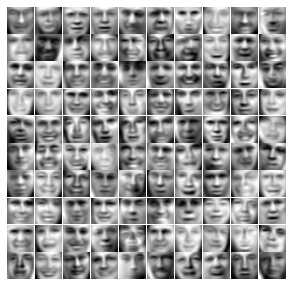

In [145]:
display_data(x_recover_to_unscaled[:100], figsize=(5, 5))